
# Taller de Sesgo y Sentimiento en Tweets 🐦

En este taller aplicarás el flujo completo de análisis de texto para responder **preguntas específicas** sobre un conjunto de tweets
etiquetados como `biased` o `non-biased`.


In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-05-02 01:14:59--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-05-02 01:14:59--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s


## 1. Cargar y explorar la distribución de etiquetas

**Instrucciones**  
* Carga el archivo `tweets_bias.csv`.  
* Muestra un recuento y un gráfico de barras de `biased` vs `non-biased`.

**Preguntas a responder**  
1. ¿Cuántos tweets hay de cada clase?  
RTA: En la clase de biased hay 318 tweets y non-biased hay 1596 tweets
2. ¿Cuál es el porcentaje de `biased` sobre el total?     
RTA: El porcentaje de biased sobre el total es 16.61%


In [2]:
import pandas as pd, re, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter
import nltk; nltk.download('stopwords'); from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
data=pd.read_csv('Gender_bias_spanish.csv')

In [4]:
class_counts = data.groupby('Label')['Label'].count()
print(class_counts)

Label
biased         318
non-biased    1596
Name: Label, dtype: int64


In [5]:
total_tweets = len(data)
print(f"total_tweets: {total_tweets}")
biased_tweets = len(data[data['Label'] == 'biased'])
print(f"biased_tweets: {biased_tweets}")
non_biased_tweets = len(data[data['Label'] == 'non-biased'])
print(f"non_biased_tweets: {non_biased_tweets}")
percentage_biased = (biased_tweets / total_tweets) * 100
print(f"Porcentaje de tweets 'biased': {percentage_biased:.2f}%")


total_tweets: 1914
biased_tweets: 318
non_biased_tweets: 1596
Porcentaje de tweets 'biased': 16.61%


<ipython-input-24-39921669f3b4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=data, palette=['crimson', 'blue'])


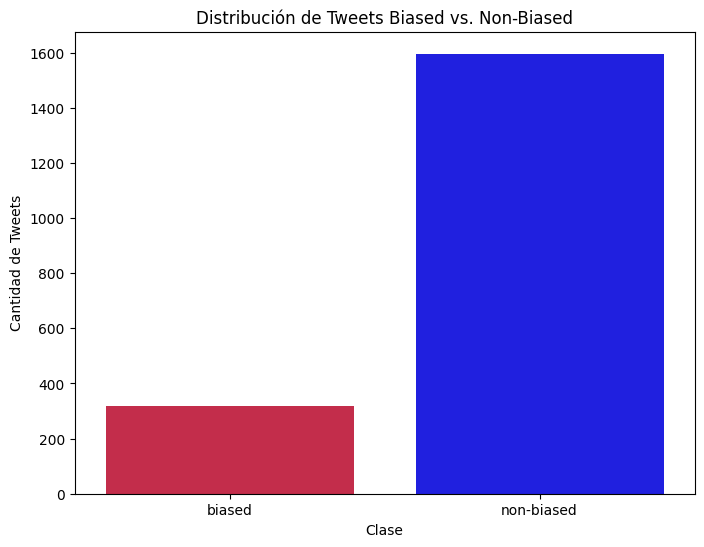

In [24]:
class_counts = data.groupby('Label')['Label'].count()

plt.figure(figsize=(8, 6))
colors = ['crimson','blue']
sns.countplot(x='Label', data=data, palette=['crimson', 'blue'])
plt.title('Distribución de Tweets Biased vs. Non-Biased')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Tweets')
plt.show()


## 2. Limpieza y normalización

**Instrucciones**  
Realiza las siguientes transformaciones sobre la columna `text`:

1. Minúsculas.  
2. Quitar tildes.  
3. Eliminar URLs, menciones (`@user`) y hashtags (#tag).  
4. Quitar caracteres no alfabéticos.  
5. Eliminar *stop‑words* en español.
6. Eliminar palabras con menos de 3 caracteres

Guarda el resultado en `clean`.

**Preguntas a responder**  
1. ¿En cuánto cambió la **longitud media** (caracteres) de los tweets tras la limpieza?  
RTA: El cambio en la longitud media de los tweets es 41.44 caracteres
2. ¿Cuántos tweets quedaron vacíos después de la limpieza?       
RTA: La cantidad de tweets vacíos después de la limpieza es 0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contents  1914 non-null   object
 1   Label     1914 non-null   object
dtypes: object(2)
memory usage: 30.0+ KB


In [8]:
data.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


In [9]:
data['clean']=data['Contents'].str.lower()
data.head()

,Contents,Label,clean
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,@chumeltorres ya cabrón! sin tí se reciben las...
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,¿alguien es tan amable de ir a hacerme la comp...
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,"@jenniferduquee hahaha, si está rico, nadamas ..."
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,@evagelcot donde lo ves!!? es mi programa favo...
4,como siempre mi tortilla triunfa mas que otros...,non-biased,como siempre mi tortilla triunfa mas que otros...


In [10]:
data['clean'] = data['clean'].str.translate(str.maketrans('áéíóúüñÁÉÍÓÚÜÑ', 'aeiouunAEIOUUN'))
data.head()

,Contents,Label,clean
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,@chumeltorres ya cabron! sin ti se reciben las...
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,¿alguien es tan amable de ir a hacerme la comp...
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,"@jenniferduquee hahaha, si esta rico, nadamas ..."
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,@evagelcot donde lo ves!!? es mi programa favo...
4,como siempre mi tortilla triunfa mas que otros...,non-biased,como siempre mi tortilla triunfa mas que otros...


In [11]:
data['clean'] = data['clean'].str.replace(r'(http\S+|www\S+|https\S+|@\S+|#\S+)', '', regex=True)
data.head()

,Contents,Label,clean
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,ya cabron! sin ti se reciben las noticias sin...
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,¿alguien es tan amable de ir a hacerme la comp...
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,"hahaha, si esta rico, nadamas le falta presen..."
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,donde lo ves!!? es mi programa favorito y sol...
4,como siempre mi tortilla triunfa mas que otros...,non-biased,como siempre mi tortilla triunfa mas que otros...


In [12]:
data['clean'] = data['clean'].str.replace(r'[^a-záéíóúüñ\s]', '', regex=True)
data.head()

,Contents,Label,clean
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,ya cabron sin ti se reciben las noticias sin ...
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,alguien es tan amable de ir a hacerme la compr...
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,hahaha si esta rico nadamas le falta presenta...
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,donde lo ves es mi programa favorito y solo e...
4,como siempre mi tortilla triunfa mas que otros...,non-biased,como siempre mi tortilla triunfa mas que otros...


In [13]:
stop_words = stopwords.words('spanish')
data['clean'] = data['clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
data.head()

,Contents,Label,clean
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,cabron reciben noticias colchoncito puro ching...
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,alguien tan amable ir hacerme compra manana ba...
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,hahaha si rico nadamas falta presentacion
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,ves programa favorito solo encuentro temporada...
4,como siempre mi tortilla triunfa mas que otros...,non-biased,siempre tortilla triunfa mas platos


In [14]:
data['clean'] = data['clean'].apply(lambda x: ' '.join([word for word in x.split() if len(word) >= 3]))
data.head()

,Contents,Label,clean
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,cabron reciben noticias colchoncito puro ching...
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,alguien tan amable hacerme compra manana bajon...
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,hahaha rico nadamas falta presentacion
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,ves programa favorito solo encuentro temporada...
4,como siempre mi tortilla triunfa mas que otros...,non-biased,siempre tortilla triunfa mas platos


In [15]:
original_length = data['Contents'].str.len().mean()
cleaned_length = data['clean'].str.len().mean()
change_in_length = original_length - cleaned_length
print(f"El cambio en la longitud media de los tweets es: {change_in_length:.2f} caracteres")

empty_tweets_count = data['clean'].str.len()[data['clean'].str.len() == 0].count()
print(f"La cantidad de tweets vacíos después de la limpieza es: {empty_tweets_count}")

El cambio en la longitud media de los tweets es: 41.44 caracteres
La cantidad de tweets vacíos después de la limpieza es: 0



## 3. Palabras características por etiqueta

**Instrucciones**  
Para cada clase (`biased` y `non-biased`):

* Calcula las 10 palabras más frecuentes y grafícalas.
* Genera una nube de palabras (colormap `plasma` para `biased`, `viridis` para `non-biased`).

**Preguntas a responder**  
1. ¿Qué palabras son exclusivas o más frecuentes en `biased`?  
RTA: En los tweets clasificados como biased, predominan palabras asociadas al género y a estereotipos sociales, como “mujer”, “mujeres”, “hombre”, “niño”, “mamá”, “chica” y “novio”.  También aparecen términos con connotaciones negativas enfocandose en relaciones personales y juicios de valor, lo que muestra la presencia de sesgos o expresiones más cargadas emocionalmente.
2. ¿Qué diferencias de tono observas entre ambas nubes?           
RTA:  Los tweets biased tienden a ser más emocionales, subjetivos y polémicos, mostrando posibles prejuicios o estereotipos. En cambio, los tweets non-biased muestran un lenguaje más neutral, cotidiano y positivo, con palabras como “gracias”, “día”, “vida”, “bueno”, “feliz” y “mejor”, enfocándose más en cosas generales y emociones comunes sin referencias marcadas a género o juicios.


<ipython-input-37-76fe17cc2a19>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df_top_words,  palette='Paired')


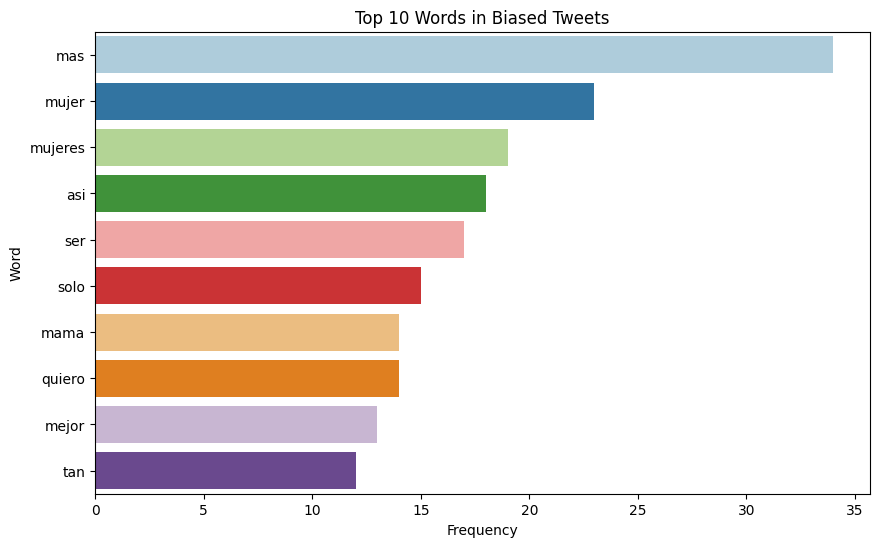

<ipython-input-37-76fe17cc2a19>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df_top_words,  palette='Paired')


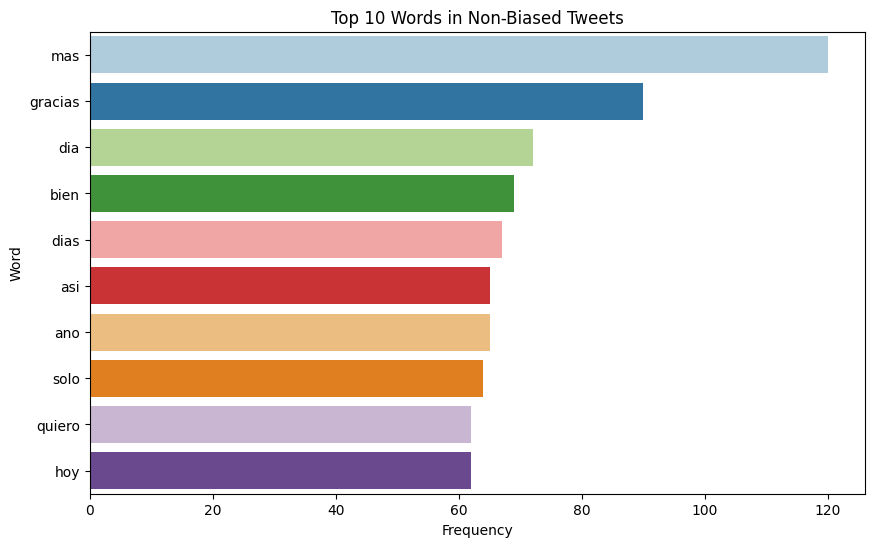

In [37]:
def plot_top_words(data, label, title):
    filtered_data = data[data['Label'] == label]
    all_text = ' '.join(filtered_data['clean'].astype(str).tolist())
    word_counts = Counter(all_text.split())
    top_words = word_counts.most_common(10)
    df_top_words = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=df_top_words,  palette='Paired')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

plot_top_words(data, 'biased', 'Top 10 Words in Biased Tweets')
plot_top_words(data, 'non-biased', 'Top 10 Words in Non-Biased Tweets')

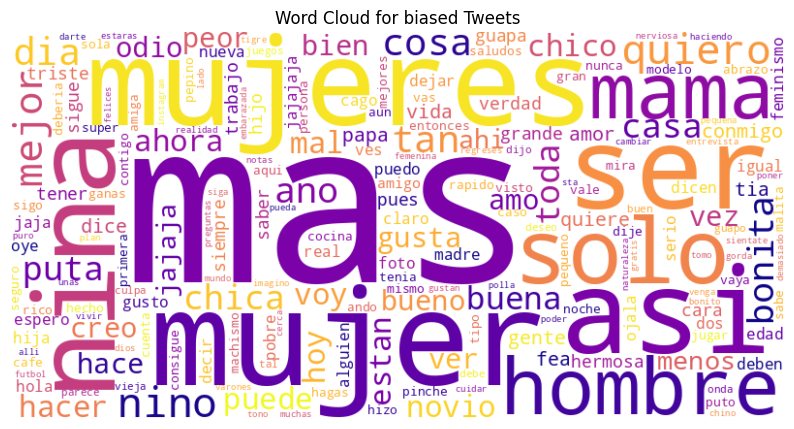

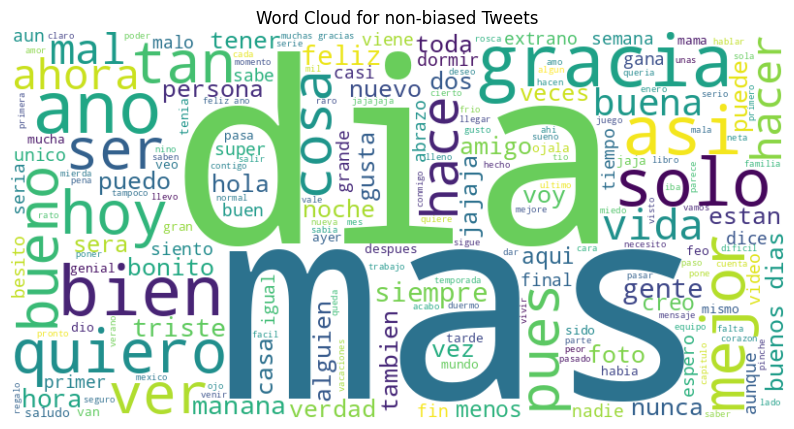

In [17]:
def plot_wordcloud(data, label, colormap):
    filtered_data = data[data['Label'] == label]
    all_text = ' '.join(filtered_data['clean'].astype(str).tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=colormap).generate(all_text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {label} Tweets')
    plt.show()

plot_wordcloud(data, 'biased', 'plasma')
plot_wordcloud(data, 'non-biased', 'viridis')


## 4. Análisis de sentimiento

**Instrucciones**  
* Calcula la polaridad con *TextBlob* para cada tweet.
* Dibuja un **histograma superpuesto** de polaridad para `biased` y `non-biased`.

**Preguntas a responder**  
1. ¿Hay diferencias significativas en la distribución de sentimiento?  
RTA: En los non-biased tweets la distribución se centra principalmente en un sentimiento ligeramente positivo, con un pico cercano a la polaridad de 0,1. Mientras que en los biased tweets la distribución es más dispersa y presenta una mayor frecuencia de tweets con puntuaciones de polaridad negativa en comparación con los otros. Esto muestra una gama más amplia de sentimientos expresados ​​en los biased tweets.
2. ¿Los tweets `biased` son, en promedio, más negativos, neutrales o positivos?                           
RTA: Los tweets biased son, en promedio, neutrales ya que su promedio es 0.0

In [18]:
data['polarity'] = data['clean'].apply(lambda text: TextBlob(text).sentiment.polarity)
data['polarity'].head()

,polarity
0,0.0
1,0.0
2,0.2
3,0.0
4,0.0


In [19]:
data.head()

,Contents,Label,clean,polarity
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,cabron reciben noticias colchoncito puro ching...,0.0
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,alguien tan amable hacerme compra manana bajon...,0.0
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,hahaha rico nadamas falta presentacion,0.2
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,ves programa favorito solo encuentro temporada...,0.0
4,como siempre mi tortilla triunfa mas que otros...,non-biased,siempre tortilla triunfa mas platos,0.0


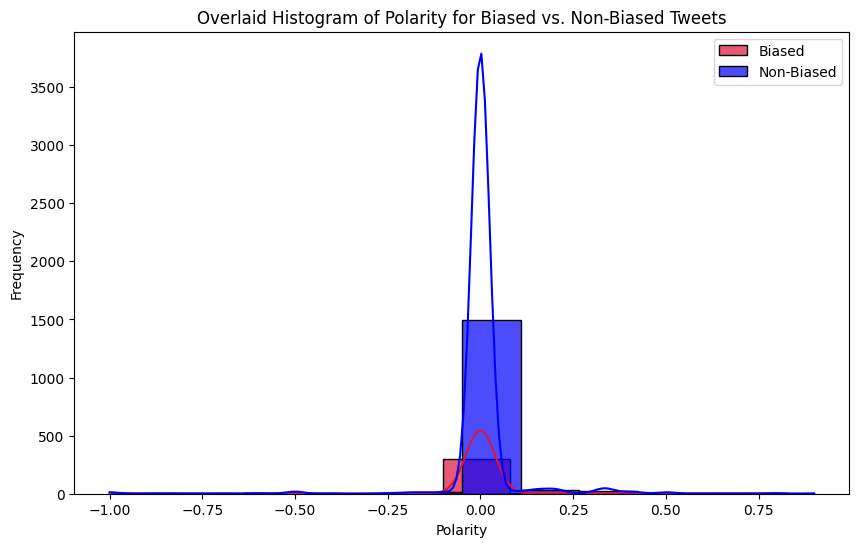

In [23]:
biased_data = data[data['Label'] == 'biased']
non_biased_data = data[data['Label'] == 'non-biased']

plt.figure(figsize=(10, 6))
sns.histplot(biased_data['polarity'], label='Biased', color='crimson', alpha=0.7, kde=True)
sns.histplot(non_biased_data['polarity'], label='Non-Biased', color='blue', alpha=0.7, kde=True)
plt.title('Overlaid Histogram of Polarity for Biased vs. Non-Biased Tweets')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [31]:
mean_polarity_biased = data[data['Label'] == 'biased']['polarity'].mean()
print(f"Mean polarity of biased tweets: {mean_polarity_biased:.2f}")

Mean polarity of biased tweets: 0.00



## 5. Hashtags y menciones más comunes

**Instrucciones**  
* Extrae hashtags y menciones originales.  
* Muestra los 10 más frecuentes de cada tipo en un gráfico de barras.

**Preguntas a responder**  
1. ¿Algún hashtag se asocia fuertemente a tweets `biased`?                 
RTA: El hashtag #hablaconellas podría estar asociado a tweets biased, ya que sugiere una temática relacionada con género
2. ¿Qué usuarios son los más mencionados y en qué contexto?             
RTA: Los usuarios más mencionados son @blassauryn, @juarrallo, @youtube, @tenistachanel, y @celopanY, entre otros. Estos están relacionados con contenido de entretenimiento, opinión o influencers


In [21]:
# Function to extract hashtags
def extract_hashtags(text):
    hashtags = re.findall(r"#(\w+)", text)
    return hashtags

# Function to extract mentions
def extract_mentions(text):
    mentions = re.findall(r"@(\w+)", text)
    return mentions

# Apply functions to the 'Contents' column
data['hashtags'] = data['Contents'].apply(extract_hashtags)
data['mentions'] = data['Contents'].apply(extract_mentions)

# Display the updated DataFrame
data

,Contents,Label,clean,polarity,hashtags,mentions
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,cabron reciben noticias colchoncito puro ching...,0.0,[extrañoreirconchumel],[chumeltorres]
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,alguien tan amable hacerme compra manana bajon...,0.0,[],[]
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,hahaha rico nadamas falta presentacion,0.2,[],[jenniferduquee]
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,ves programa favorito solo encuentro temporada...,0.0,[],[evagelcot]
4,como siempre mi tortilla triunfa mas que otros...,non-biased,siempre tortilla triunfa mas platos,0.0,[playa],[]
...,...,...,...,...,...,...
1909,"iba a ir a dash pero mis 3 cortadas, mi color ...",non-biased,iba dash cortadas color piel color langosta ho...,0.0,[],[]
1910,que pinche chiste tiene estar medio alto si to...,non-biased,pinche chiste medio alto aqui estan bien pigmeos,0.0,[],[]
1911,si fuera bien idiota. ya hubiera comprado un a...,non-biased,bien idiota comprado alienware quincena chaz c...,0.0,[],[]
1912,nota mental: no le quieras ayudar a alguien qu...,non-biased,nota mental quieras ayudar alguien confia prim...,-0.1,[],[]


<ipython-input-35-d2a743373a51>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Item', data=df_top_items, palette='tab10')


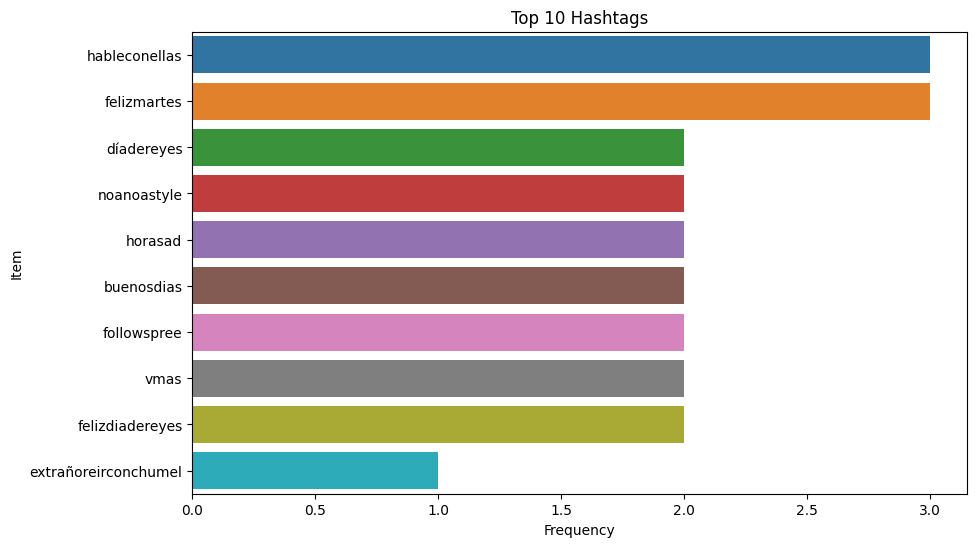

<ipython-input-35-d2a743373a51>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Item', data=df_top_items, palette='tab10')


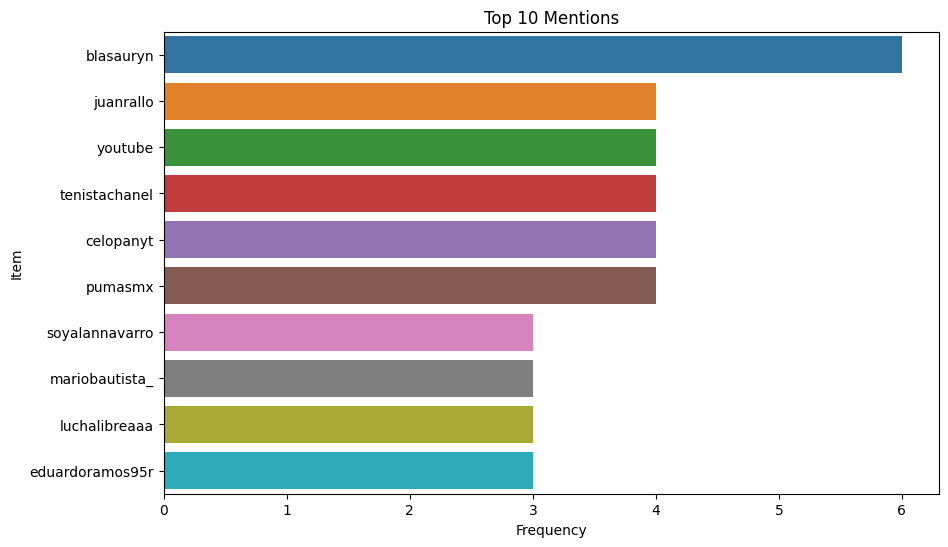

In [35]:
def plot_top_n(data, column, title, n=10):
    all_items = [item for sublist in data[column] for item in sublist]
    top_items = Counter(all_items).most_common(n)

    df_top_items = pd.DataFrame(top_items, columns=['Item', 'Frequency'])

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Item', data=df_top_items, palette='tab10')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Item')
    plt.show()

plot_top_n(data, 'hashtags', 'Top 10 Hashtags', n=10)
plot_top_n(data, 'mentions', 'Top 10 Mentions', n=10)


## 6. Conclusiones

Responde brevemente:

* Dos insights sobre el **sesgo** lingüístico.                           
RTA:  
1. El análisis reveló la presencia de estereotipos de género, especialmente en biased tweets. Palabras como "mujer", "mujeres", "hombre", "niño", "mamá", "chica" y "novio" fueron predominantes, lo que muestra un enfoque en los roles de género.
2. Los biased tweets tendieron a contener más palabras con connotaciones negativas, lo que podría reflejar prejuicios o actitudes discriminatorias.
* Un insight sobre el **sentimiento**.  
RTA: Si bien los biased tweets mostraron una gama más amplia de sentimientos en comparación con los non-biased, el sentimiento general fue relativamente neutral. Esto quiere decir que el lenguaje sesgado no siempre lleva a un sentimiento negativo, pero aun así puede mantener estereotipos y sesgos perjudiciales.
* Una recomendación de comunicación para la marca.                    
RTA: Según el análisis, la marca debería priorizar el lenguaje inclusivo en sus comunicaciones. Debe evitar términos de género, estereotipos y lenguaje dañino. Al promover la diversidad y el respeto, la marca puede fomentar un entorno en línea más positivo e inclusivo.